<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span><ul class="toc-item"><li><span><a href="#Integrals:-Definition" data-toc-modified-id="Integrals:-Definition-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Integrals: Definition</a></span></li><li><span><a href="#Approximate-Integration:-Euler's-Method" data-toc-modified-id="Approximate-Integration:-Euler's-Method-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Approximate Integration: Euler's Method</a></span></li><li><span><a href="#Empirical-Models:-fitting-polynomials-in-MATLAB/Octave" data-toc-modified-id="Empirical-Models:-fitting-polynomials-in-MATLAB/Octave-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Empirical Models: fitting polynomials in MATLAB/Octave</a></span></li></ul></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assignment</a></span><ul class="toc-item"><li><span><a href="#Deliverables:-System-Scoping" data-toc-modified-id="Deliverables:-System-Scoping-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Deliverables: System Scoping</a></span></li><li><span><a href="#Deliverables:-Model-Construction" data-toc-modified-id="Deliverables:-Model-Construction-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Deliverables: Model Construction</a></span></li><li><span><a href="#Deliverables:-Model-Evaluation" data-toc-modified-id="Deliverables:-Model-Evaluation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Deliverables: Model Evaluation</a></span></li></ul></li></ul></div>

# Challenge

In this reading, your challenge is to use what you have learned to predict how the velocity of the blue car will evolve during the following experiment, after it reaches the flat portion of the table. You may collect data from this video for **model verification only**.

In [ ]:
%%html
<iframe width="900" height="540" src="https://www.youtube.com/embed/0cGsrFLqUHI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

To aid you in constructing a model that you can use for this task, Data were collected for a similar experiment using a high-accuracy sensor, and are provided with this assignment. Columns in the data file are time and car velocity (m/s). You can load the data using the following command:

```octave
data = load('reading6data.txt');
```

You will need to examine how the derivative of the car's velocity (its acceleration) relates to the velocity itself during the experiment. You will be able to derive a *differential equation* for the system if you develop a model for this relationship. 

In the last assignment, you used repeated extrapolations to get a solution to a differential equation. You can do the same here, but to avoid the tedious nature of repeating the extrapolation calculations manually over and over, it will help to develop a generalizable algorithm. This "repeated extrapolation" you performed in the last assignment is actually a form of approximate *integration*. Because the differential equation for some function $Y$ involves that functions *derivative or derivatives*, integration is a method of finding a solution to the differential equation.

## Integrals: Definition

For our purposes in this course, we will define the integral of a function $y(t)$, using the notation $\int y(t) dt$, as follows:

The function $Y(t)$ is the *integral* of a function $y(t)$ if $\frac{d}{dt} Y(t) = y(t)$ for all values of $t$.

This means, in simple terms, that the derivative of $Y(t)$ is $y(t)$. Integrals are often visualized or introduced in calculus classes as "the area under a curve," which is certainly a useful way to conceptualize them. Consider, for example, the scenario in the graphic below, which explains the relationship between a constant and its integral.

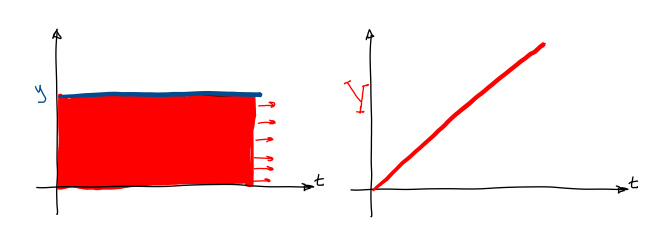

When the functional form of $y$ is known, it is possible to compute an *indefinite integral* for it, yielding the function $Y$ in our definition. However, for an arbitrary dataset, whose functional form may not be known, often the best we can do is to *approximate* the integral of a function. 

The process of "repeated extrapolation" that you used in the previous assignment is actually a form of approximate integration. How? Read the definition of approximate integration using "Euler's Method" below.

## Approximate Integration: Euler's Method

In Euler's method of approximate integration, also called the "rectangular approximation" of an integral, The area under a curve, $y(t)$, which yields $\int y(t) dt = Y(t)$, can be *approximated* by repeatedly summing the area of rectangles  projected either forwards or backwards in time from each discrete measurement of $y$. The process begins with some initial, known value of the integral $Y_0$, the value of $Y(t)$ is incremented by the area of the corresponding rectangle on the plot of $y(t)$. The process is shown visually below.

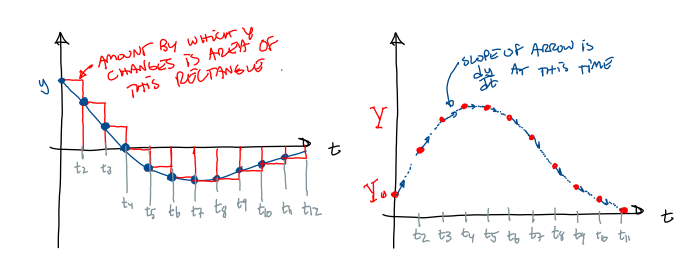

As you can see in the second plot, the idea is to use one, known value of our integral, $Y$, at the very start of the procedure. This is often called the *initial value* of $Y$. Then, the area under the derivative plot from $y(t_1)$ to $y(t_2)$ is added to our estimate of $Y$, and this value, when added to $Y_0$, becomes $Y(t_2)$. Formally, this can be written as:

$Y(t_2) = Y_0 + y(t1)\cdot(t_2-t_1)$

From $t_2$ to $t_3$, the procedure is repeated. In other words, the rectangle defined by the value of $y(t_2)$ is used to add "a little more" to our estimate to produce $Y(t_3)$. Formally,

$Y(t_3) = Y_0 + y(t_1)\cdot(t_2-t_1) + y_(t_2)\cdot(t_3-t_2)$

Using a "recursive formulation," we could equivalently write:

$Y(t_3) = Y(t_2) + y(t_2)\cdot(t_3-t_2)$

And so on. **In this description, we projected the value of $y$ forwards in the creation of our approximate rectangles. Therefore, this particular variant of Euler integration is called "Forward Euler" integration.** "Backward Euler" integration is also possible. As with approximations of derivatives, the smaller the differences between times we use in the projection of the rectangles, the better our approximation of the derivative will be.

Because approximate integration is often performed on data arranged as arrays, we can use the counting index $k$ to write this as an equation that could be built into a "for loop" and computed efficiently in code. Considering arrays representing time $t$, derivative $y$, and integral $Y$, we could write an equation for any entry in the output array $Y(k)$ as:

$Y(k) = Y(k-1) + y(k-1)\cdot(t(k)-t(k-1))$

This should look similar to the equation for a line that you might use for *linear extrapolation*. Indeed, this equation is an equation for a line in point-slope form. We use each estimate for $Y(k-1)$ to produce an estimate for the *next* value of our integral $Y(k)$ using linear extrapolation. This is shown visually on the right panel of the plot above.

An example of how to implement approximate Euler integration in MATLAB/Octave is shown below. The approximate integral is compared with the "true" integral of the function to show its accuracy. Try changing the timestep $T$ in the code cell below to see how accuracy is affected by the size of the time step used for extrapolation/integration. A large value of $T$ is problematic for the same reason large extrapolations were problematic in Reading 4.

In [ ]:
T = 0.01; %timestep
t = 0:T:1; %time vector
y = cos(10*t); %function we wish to integrate. This may come from data rather than a known function of t.

Y_estimate = zeros(size(t)); %initialize an array to hold our estimates for Y, the integral of y.
Y0 = 0; %some initial, known value for the integral at the beginning.
Y_estimate(1) = Y0; %place this value in the first entry of our array

Y_true = 0.1*sin(10*t); %for this example, we know that d/dt(sin(t)) = cos(t). 
%We will use this "exact" solution to the integral to allow us to see how accurate Euler integration is.

%now set up a for-loop starting at the second entry in Y_estimate, since we already know Y_estimate(1)=Y0
for k=2:length(t) %automatically set up the for-loop to be the right length
    %now implement Euler's formula. remember that here, y is dY/dt.
    Y_estimate(k) = Y_estimate(k-1) + y(k-1)*(t(k)-t(k-1));
end

%now we will compare our approximate integral with our "true" value to see if Euler integration works.

figure
plot(t,Y_true,'k.',t,Y_estimate,'r')
xlabel('Time (s)')
ylabel('Y(t)')
legend('true','Forward Euler Integration')

As you can see, Euler integration can be fairly accurate. Try different values of the time step $T$ in the code cell above to see how its value affects the accuracy of Euler integration.

In your challenge for this week, you may find this quick way to perform the 'repeated extrapolation' you used in the last assignment helpful. It is also true that in your case, your derivative ($y$ in the example above) is *related to the current value of the integral $Y$*. This is an easy difference to account for in your solution, but only if you have an equation for $y$ as a function of $Y$. In the last assignment, you may have "eyeballed" this functional relationship. This time, you may want to use a new tool: the polynomial fit.

## Empirical Models: fitting polynomials in MATLAB/Octave

MATLAB/Octave can be used to estimate a "best fit" polynomial function to match a dataset. The term "best fit," in this context, means that the sum of the squared error between the model and the data is minimized. The command used to produce the set of coefficients is "polyfit." An example of how to use the "polyfit" command to produce the best-fit line for a dataset is shown below.

In [ ]:
% first, create some fake "data" we will fit a line to, in order to see how "polyfit" works.
xfakedata = 0:.1:10;
yfakedata = -3*xfakedata + 4 + .5*randn(size(xfakedata)); %the randn() on the end produces some random "noise" on our fake data.
%this simulates the effect of having error in our measurements. If polyfit does its job, we should get the line y = -3x+4 back!

%now we will actually use polyfit. The array "coefficients" will contain [m b] in the equation y = m*x+b.
%the second argument to the polyfit() function is the ORDER of the polynomial. A line is a polynomial of order 1. 
%for reference, a quadratic is a polynomial of order 2.
coefficients = polyfit(xfakedata,yfakedata,1); 
%was m=-3 and b=4?
m_estimate = coefficients(1)
b_estimate = coefficients(2)

%now, these coefficients fully define a "model" of our relationship y = m*x+b. Let's produce predictions based on this model
ymodel = m_estimate*xfakedata + b_estimate;

%now plot the data and the model together to evaluate.
figure
plot(xfakedata,yfakedata,'ks',xfakedata,ymodel,'r')
xlabel('x')
ylabel('y')
legend('data','model')

# Assignment


Using your now-refined knowledge of repeated extrapolation, or the "Forward Euler" approximation for integration, along with your newfound knowledge of how to estimate a functional relationship between two variables using the "polyfit" command, you will:

1. Use the data provided in `reading6data.txt` to estimate a functional relationship between the car's velocity and its acceleration after it reaches flat ground
2. Use this functional relationship, along with the first measured *speed* of the car in the video provided, to predict the car's velocity during the experiment in the video in 0.01 second increments. Note that you will have to create your own time vector, since the video's frame rate is not that high.
3. Use this prediction of the car's velocity during the experiment to estimate its *position* during the experiment. You can obtain position estimates by integrating your velocity model.
4. Using measurements of car position from the video above, compare your model with data from the experiment to *evaluate* your model for the car's position.

To make data collection for the model evaluation step easier, a slowed-down and timestamped version of the original video is provided below. Rapid use of the spacebar should allow you to record a position of the car for every unique time in the video.

In [ ]:
%%html
<iframe width="900" height="540" src="https://www.youtube.com/embed/zVmqhnhrXB4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


## Deliverables: System Scoping

Provide a diagram showing your system model's inputs and outputs, along with a terse but complete description of the contents of the model.

YOUR ANSWER HERE

## Deliverables: Model Construction

Provide any hand calculations you use in the construction of your model in the Markdown cell provided, and any code you use to fit a functional relationship between the car's velocity and its acceleration in the code cell below. You may also "run your model" in this code cell if you wish to provide estimates of the car's velocity during the test. The dataset in `reading6data.txt` has been provided for you to use in your model construction steps.

YOUR ANSWER HERE

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

## Deliverables: Model Evaluation

Use your velocity model to finally produce estimates for the car's position during the test in the video. Collect data from the video, and compare your predictions with your measurements.

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')